# List files

In [234]:
PATH='/home/sravya/data/Kaggle/zillow/'
import glob
import pprint
pprint.pprint(glob.glob(PATH+'*'))

['/home/sravya/data/Kaggle/zillow/zillow_data_dictionary.xlsx',
 '/home/sravya/data/Kaggle/zillow/sample_submission.csv',
 '/home/sravya/data/Kaggle/zillow/__MACOSX',
 '/home/sravya/data/Kaggle/zillow/properties_2016.csv',
 '/home/sravya/data/Kaggle/zillow/train_2016_v2.csv']


# Load from CSV using pandas

In [235]:
import pandas as pd
import numpy as np

In [236]:
props = pd.read_csv('/home/sravya/data/Kaggle/zillow/properties_2016.csv')

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fbb8db3f7b8>>
Traceback (most recent call last):
  File "/home/sravya/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
/home/sravya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [237]:
props.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,...,nan,NaN,nan,9.0000,2015.0000,9.0000,nan,NaN,nan,nan
1,10759547,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,...,nan,NaN,nan,27516.0000,2015.0000,27516.0000,nan,NaN,nan,nan
2,10843547,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,...,nan,NaN,650756.0000,1413387.0000,2015.0000,762631.0000,20800.3700,NaN,nan,nan
3,10859147,nan,nan,nan,0.0000,0.0000,3.0000,7.0000,nan,nan,...,1.0000,NaN,571346.0000,1156834.0000,2015.0000,585488.0000,14557.5700,NaN,nan,nan
4,10879947,nan,nan,nan,0.0000,0.0000,4.0000,nan,nan,nan,...,nan,NaN,193796.0000,433491.0000,2015.0000,239695.0000,5725.1700,NaN,nan,nan


In [238]:
train = pd.read_csv('/home/sravya/data/Kaggle/zillow/train_2016_v2.csv')
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [239]:
sample_submission = pd.read_csv('/home/sravya/data/Kaggle/zillow/sample_submission.csv')
sample_submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [240]:
dictionary = pd.read_excel('/home/sravya/data/Kaggle/zillow/zillow_data_dictionary.xlsx')
dictionary.head()

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home


# Data exploration

## Generic exploration

In [241]:
props.shape

(2985217, 58)

In [242]:
props.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2985217.0000,811519.0000,6061.0000,1628.0000,2973755.0000,2973767.0000,12629.0000,1938488.0000,2856305.0000,17096.0000,...,2647.0000,2925289.0000,682069.0000,2930235.0000,2942667.0000,2973778.0000,2917484.0000,2953967.0000,56464.0000,2910091.0000
mean,13325858.3602,1.9312,7.2026,646.8833,2.2091,3.0889,3.7259,5.7848,2.2993,66.0000,...,278.2966,1964.2616,1.4015,170883.5772,420478.9907,2014.9995,252478.0295,5377.6071,13.8924,60484312212574.4297
std,7909966.3892,3.1486,2.4363,538.7935,1.0778,1.2759,0.5017,1.8054,1.0007,0.0000,...,369.7315,23.4413,0.5391,402068.3420,726346.6518,0.0368,445013.1696,9183.1071,2.5810,324903454737.3072
min,10711725.0000,1.0000,2.0000,20.0000,0.0000,0.0000,1.0000,1.0000,1.0000,66.0000,...,10.0000,1801.0000,1.0000,1.0000,1.0000,2000.0000,1.0000,1.3400,0.0000,-1.0000
25%,11643707.0000,1.0000,7.0000,272.0000,2.0000,2.0000,3.0000,4.0000,2.0000,66.0000,...,96.0000,1950.0000,1.0000,74800.0000,179675.0000,2015.0000,74836.0000,2461.0700,14.0000,60374002041015.0000
50%,12545094.0000,1.0000,7.0000,534.0000,2.0000,3.0000,4.0000,7.0000,2.0000,66.0000,...,168.0000,1963.0000,1.0000,122590.0000,306086.0000,2015.0000,167042.0000,3991.7800,14.0000,60375715022011.0000
75%,14097122.0000,1.0000,7.0000,847.2500,3.0000,4.0000,4.0000,7.0000,3.0000,66.0000,...,320.0000,1981.0000,2.0000,196889.0000,488000.0000,2015.0000,306918.0000,6201.0050,15.0000,60590423191014.0000
max,169601949.0000,13.0000,27.0000,8516.0000,20.0000,20.0000,5.0000,12.0000,20.0000,66.0000,...,6141.0000,2015.0000,41.0000,251486000.0000,282786000.0000,2016.0000,90246219.0000,3458861.1200,99.0000,483030105084015.0000


In [243]:
pd.set_option('precision', 6)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
props.describe()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fbb8db81f28>>
Traceback (most recent call last):
  File "/home/sravya/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2985217,811519,6061,1628,2973755,2973767,12629,1938488,2856305,17096,...,2647,2925289,682069,2930235,2942667,2973778,2917484,2953967,56464,2910091
mean,13325858,2,7,647,2,3,4,6,2,66,...,278,1964,1,170884,420479,2015,252478,5378,14,60484312212574
std,7909966,3,2,539,1,1,1,2,1,0,...,370,23,1,402068,726347,0,445013,9183,3,324903454737
min,10711725,1,2,20,0,0,1,1,1,66,...,10,1801,1,1,1,2000,1,1,0,-1
25%,11643707,1,7,272,2,2,3,4,2,66,...,96,1950,1,74800,179675,2015,74836,2461,14,60374002041015
50%,12545094,1,7,534,2,3,4,7,2,66,...,168,1963,1,122590,306086,2015,167042,3992,14,60375715022011
75%,14097122,1,7,847,3,4,4,7,3,66,...,320,1981,2,196889,488000,2015,306918,6201,15,60590423191014
max,169601949,13,27,8516,20,20,5,12,20,66,...,6141,2015,41,251486000,282786000,2016,90246219,3458861,99,483030105084015


In [244]:
props['finishedfloor1squarefeet'].describe()

count   202717
mean      1381
std        633
min          3
25%       1012
50%       1283
75%       1615
max      31303
Name: finishedfloor1squarefeet, dtype: float64

In [245]:
props['fips'].describe()

count   2973780
mean       6048
std          20
min        6037
25%        6037
50%        6037
75%        6059
max        6111
Name: fips, dtype: float64

In [246]:
props['fireplaceflag'].describe()
# Are some of the missing values false? or all?

count     5163
unique       1
top       True
freq      5163
Name: fireplaceflag, dtype: object

In [247]:
props['hashottuborspa'].describe()
# Are some of the missing values false? or all?

count     69014
unique        1
top        True
freq      69014
Name: hashottuborspa, dtype: object

In [248]:
props['heatingorsystemtypeid'].describe()

count   1806401
mean          4
std           3
min           1
25%           2
50%           2
75%           7
max          24
Name: heatingorsystemtypeid, dtype: float64

In [249]:
props['pooltypeid10'].describe()

count   36939
mean        1
std         0
min         1
25%         1
50%         1
75%         1
max         1
Name: pooltypeid10, dtype: float64

In [250]:
props['pooltypeid2'].describe()

count   32075
mean        1
std         0
min         1
25%         1
50%         1
75%         1
max         1
Name: pooltypeid2, dtype: float64

In [251]:
props['pooltypeid7'].describe()

count   485459
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          1
Name: pooltypeid7, dtype: float64

In [252]:
props['propertycountylandusecode'].describe()

count     2972940
unique        240
top          0100
freq      1153896
Name: propertycountylandusecode, dtype: object

In [253]:
props['propertylandusetypeid'].describe()

count   2973780
mean        260
std          16
min          31
25%         261
50%         261
75%         261
max         275
Name: propertylandusetypeid, dtype: float64

In [254]:
props['propertyzoningdesc'].describe()


count     1978629
unique       5638
top          LAR1
freq       275029
Name: propertyzoningdesc, dtype: object

In [255]:
props['rawcensustractandblock'].describe()


count    2973780
mean    60483450
std       200812
min     60371011
25%     60373203
50%     60375712
75%     60590423
max     61110091
Name: rawcensustractandblock, dtype: float64

In [256]:
props['regionidneighborhood'].describe()


count   1156402
mean     193476
std      165713
min        6952
25%       46736
50%      118920
75%      274800
max      764167
Name: regionidneighborhood, dtype: float64

In [257]:
props['yardbuildingsqft17'].describe()

count   80355
mean      320
std       233
min        10
25%       190
50%       270
75%       390
max      7983
Name: yardbuildingsqft17, dtype: float64

In [258]:
props['taxdelinquencyflag'].describe()
# Are some of the missing values false? or all?

count     56462
unique        1
top           Y
freq      56462
Name: taxdelinquencyflag, dtype: object

## Data types of features

In [259]:
props.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


## Missing values analysis

In [260]:
missing_counts = props.isnull().sum()

In [261]:
import matplotlib.pyplot as plt

In [262]:
missing_counts

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [263]:
type(missing_counts)

pandas.core.series.Series

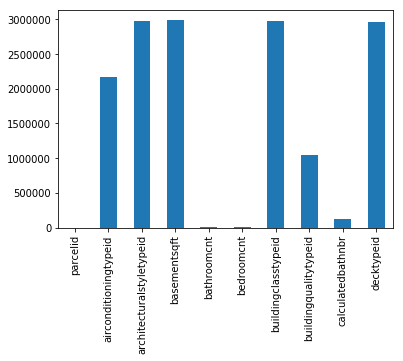

In [264]:
missing_counts[:10].plot.bar()
plt.figure(figsize=(100,100)) 
plt.show()

# XGBoost

In [265]:
import xgboost as xgb

## Preprocessing

In [266]:
from sklearn.preprocessing import LabelEncoder
for c in props.columns:
    props[c]=props[c].fillna(-1)
    if props[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(props[c].values))
        props[c] = lbl.transform(list(props[c].values))
# Understand LabelEncoder

In [267]:
train_df = train.merge(props, how='left', on='parcelid')

In [268]:
type(train_df.logerror)

pandas.core.series.Series

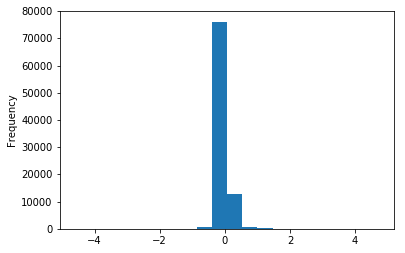

In [269]:
train_df.logerror.plot.hist(bins=20)
plt.show()

In [270]:
train_df[train_df.logerror <-0.4].parcelid.sum()

8503162862

In [271]:
train_df[train_df.logerror > 0.5].parcelid.sum()

10091118029

In [272]:
# drop out ouliers
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.5 ]
#train_df=train_df[ train_df.logerror > -0.4 ]
#train_df=train_df[ train_df.logerror < 0.418 ]

## Prepare training examples, labels and test data

In [273]:
type(train_df['transactiondate'][0])

str

In [274]:
train_df['transactiondate'][0]

'2016-01-01'

In [275]:
y_train = train_df["logerror"].values.astype(np.float32)
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
#x_train=train_df.drop(['parcelid', 'logerror'], axis=1)
x_test = props.drop(['parcelid'], axis=1)

In [276]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=test_size, random_state=seed)

In [277]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape

((59495, 57), (59495,), (29304, 57), (29304,), (2985217, 57))

## XGBoost train

In [295]:
y_mean = np.mean(y_train)
xgb_params = {
    #'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
   # 'eval_metric': 'mae',
    #'lambda': 0.8,   
    #'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}


In [296]:
clf = xgb.XGBModel(**xgb_params)
clf.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_valid, y_valid)], 
        eval_metric='mae',
        verbose=True)

[0]	validation_0-mae:0.054744	validation_1-mae:0.054043
[1]	validation_0-mae:0.054637	validation_1-mae:0.053969
[2]	validation_0-mae:0.054549	validation_1-mae:0.053905
[3]	validation_0-mae:0.054463	validation_1-mae:0.053855
[4]	validation_0-mae:0.054401	validation_1-mae:0.053814
[5]	validation_0-mae:0.054332	validation_1-mae:0.053789
[6]	validation_0-mae:0.054283	validation_1-mae:0.053761
[7]	validation_0-mae:0.054246	validation_1-mae:0.053757
[8]	validation_0-mae:0.054196	validation_1-mae:0.053731
[9]	validation_0-mae:0.054152	validation_1-mae:0.053709
[10]	validation_0-mae:0.054112	validation_1-mae:0.053699
[11]	validation_0-mae:0.054086	validation_1-mae:0.053692
[12]	validation_0-mae:0.054052	validation_1-mae:0.053681
[13]	validation_0-mae:0.05402	validation_1-mae:0.053668
[14]	validation_0-mae:0.05399	validation_1-mae:0.053671
[15]	validation_0-mae:0.053964	validation_1-mae:0.053663
[16]	validation_0-mae:0.053936	validation_1-mae:0.053656
[17]	validation_0-mae:0.053918	validation_1

XGBModel(base_score=0.0094006034, colsample_bylevel=1, colsample_bytree=1,
     gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
     min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
     objective='reg:linear', reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
     seed=0, silent=1, subsample=0.8)

## Test

In [298]:
#dtest = xgb.DMatrix(x_test)
xgb_pred = clf.predict(x_test)

In [299]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
xgb_pred

array([-0.02469542,  0.01942533,  0.04795396, ...,  0.17271759,
        0.17271759,  0.17271759], dtype=float32)

## Write to submission file

In [300]:
y_pred=[]

for i,predict in enumerate(xgb_pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

In [301]:
type(y_pred)

numpy.ndarray

In [302]:
y_pred

array(['-0.0247', '0.0194', '0.048', ..., '0.1727', '0.1727', '0.1727'], 
      dtype='<U7')

In [303]:
output = pd.DataFrame({'ParcelId': props['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime

print( "\nWriting results to disk ..." )
output.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)


Writing results to disk ...
